# Importing Necessary Libraries

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

# Loading the data

In [4]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### In this dataset 'B' means 'Benign(non-cancerous)' tumor and 'M' means'Malignant(cancerous)' tumor in the 'diagnosis' column

# Encoding the target variable

In [7]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x=='B' else 1)

# Checking Basic Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### There are no null values in the dataset and all are numeric columns

# Removing unwanted column

In [12]:
df.drop(columns={'Unnamed: 32'},inplace=True)

# Seperating the target and features columns

In [14]:
X = df.drop(columns={'diagnosis'})
y= df[['diagnosis']]

# Train Test Split of X and y

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# Scaling of columns

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Model Training and Evaluation

In [42]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1] 

print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision on test data: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall on test data: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score on test data: {:.2f}".format(f1_score(y_test, y_pred)))
print("ROC AUC score on test data: {:.2f}".format(roc_auc_score(y_test, y_prob)))
print(" "*30)
print(classification_report(y_test, y_pred))

Accuracy on test data: 0.97
Precision on test data: 0.98
Recall on test data: 0.95
F1 score on test data: 0.96
ROC AUC score on test data: 1.00
                              
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



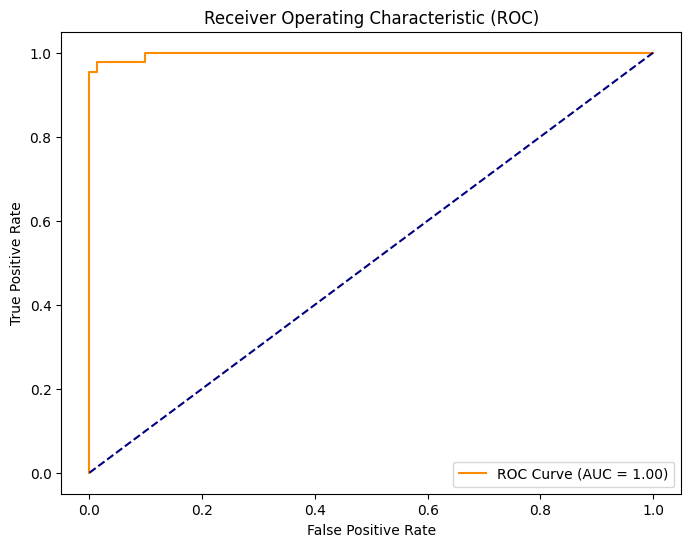

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Hyperparameter tuning

In [52]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],  # inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
    'max_iter': [100, 200, 500],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

In [54]:
model = LogisticRegression()
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

Best Params: {'C': 1, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


# Running Model with Best Parameters

In [57]:
lr = LogisticRegression(
    C=1,
    l1_ratio=0,
    max_iter=100,
    penalty='l1',
    solver='liblinear'
)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1] 

print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision on test data: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall on test data: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score on test data: {:.2f}".format(f1_score(y_test, y_pred)))
print("ROC AUC score on test data: {:.2f}".format(roc_auc_score(y_test, y_prob)))
print(" "*30)
print(classification_report(y_test, y_pred))

Accuracy on test data: 0.97
Precision on test data: 0.95
Recall on test data: 0.98
F1 score on test data: 0.97
ROC AUC score on test data: 1.00
                              
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Sigmoid function is giving a value between 0 and 1 and for a given threshold if value>= threshold then 1 is assigned i.e 'Malignant' else 0 i.e 'Benign'